In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

# 데이터프레임 생성
data = pd.DataFrame({ 'Date' : dates, 'Value' : values})

# 결측치 생성
data.loc[50:150, 'Value'] = np.nan
print(data.loc[50:150])

          Date  Value
50  2023-02-20    NaN
51  2023-02-21    NaN
52  2023-02-22    NaN
53  2023-02-23    NaN
54  2023-02-24    NaN
..         ...    ...
146 2023-05-27    NaN
147 2023-05-28    NaN
148 2023-05-29    NaN
149 2023-05-30    NaN
150 2023-05-31    NaN

[101 rows x 2 columns]


          Date  Value  Value_arima
50  2023-02-20    NaN    -0.235549
51  2023-02-21    NaN    -0.210553
52  2023-02-22    NaN    -0.226196
53  2023-02-23    NaN    -0.211666
54  2023-02-24    NaN    -0.201915
..         ...    ...          ...
146 2023-05-27    NaN    -0.011589
147 2023-05-28    NaN    -0.017155
148 2023-05-29    NaN     0.010597
149 2023-05-30    NaN     0.004525
150 2023-05-31    NaN    -0.014734

[101 rows x 3 columns]


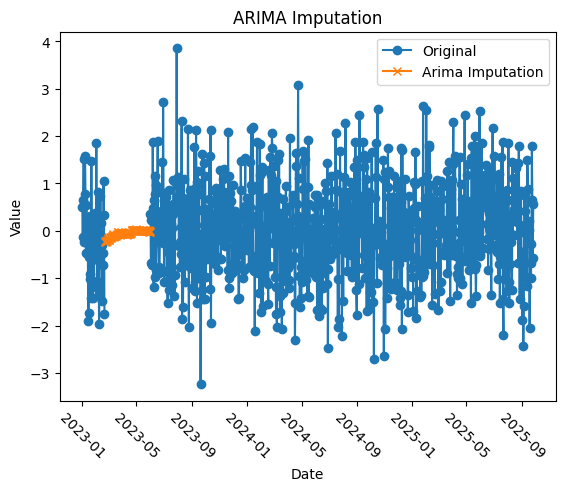

In [3]:
# ARIMA 모델 적합
model = ARIMA(data['Value'].dropna(), order=(1, 1, 1))
model_fit = model.fit()

# 결측치 예측
predicted_values = model_fit.predict(start=50, end=2000)

# 결측치 대체 
data.loc[50:150, 'Value_arima'] = predicted_values
print(data.loc[50:150])

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_arima'], 'x-', label='Arima Imputation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Imputation')
plt.xticks(rotation=-45)
plt.legend()
plt.show()